In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import json

# Source: https://www.immersivelimit.com/tutorials/create-coco-annotations-from-scratch/#create-custom-coco-dataset
import base64
import IPython
import json
import numpy as np
import os
import random
import requests
from io import BytesIO
from math import trunc
from PIL import Image as PILImage
from PIL import ImageDraw as PILImageDraw
from pycocotools.coco import COCO
import ipywidgets as wdg  # Using the ipython notebook widgets


# Coco Imagery data processor
If you have images and coco segmantations, you can use this notebook to create image masks from the segmentation data

In [15]:
IMG_DIR = "data/images"
COCO_DIR = "data/coco_data"

images = os.listdir(IMG_DIR)
annotations = os.listdir(COCO_DIR)
print(annotations)
with open(COCO_DIR + '/' + annotations[0]) as json_file:
    data = json.load(json_file)
    


['road_intersection-4.json']


### Lets view an example image

In [32]:
coco = COCO(COCO_DIR + '/' + annotations[0])
img_dir = IMG_DIR
image_id = 1
img = coco.imgs[image_id]


loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


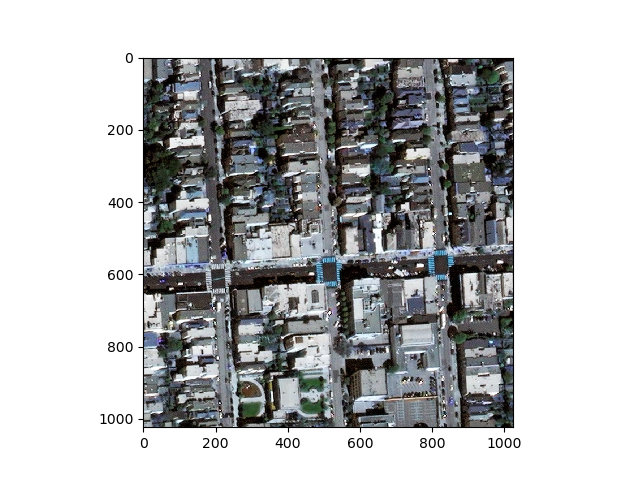

In [33]:
image = np.array(PILImage.open(os.path.join(img_dir, img['file_name'])))
plt.imshow(image, interpolation='nearest')
plt.show()

### Lets view the segmentations

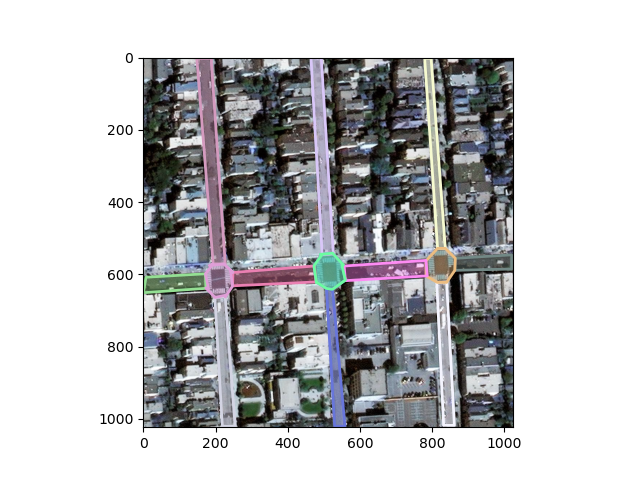

In [34]:
fig = plt.figure()
plt.imshow(image)
cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)
coco.showAnns(anns, )

### Let's create an image mask from the segmentations

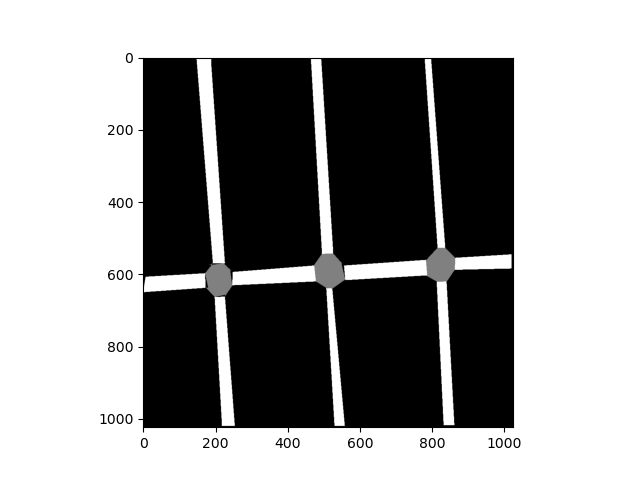

In [19]:
%matplotlib widget
cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)
anns_img = np.zeros((img['height'],img['width']))
for ann in anns:
    anns_img = np.maximum(anns_img,coco.annToMask(ann)*ann['category_id'])


    
fig = plt.figure()
plt.imshow(anns_img,cmap='gray')
# txt = wdg.Textarea(
#     value='',
#     placeholder='',
#     description='event:',
#     disabled=False
# )
# display(txt)

# # Define a callback function that will update the textarea
# def onclick(event):
#     txt.value = str(event)  # Dynamically update the text box above

# # Create an hard reference to the callback not to be cleared by the garbage collector
# ka = fig.canvas.mpl_connect('button_press_event', onclick)

## Create masks for all images in the dataset

In [31]:
for im in coco.imgs:
    img = coco.imgs[im]
    file = img['file_name']
    number = file.split('_')[1].split('.')[0]
    mask_file_name = f"mask_{number}.png"
    
    cat_ids = coco.getCatIds()
    anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
    anns = coco.loadAnns(anns_ids)
    
    anns_img = np.zeros((img['height'],img['width']))
    for ann in anns:
        anns_img = np.maximum(anns_img,coco.annToMask(ann)*ann['category_id'])
        
    mask = PILImage.fromarray(anns_img)
    mask = mask.convert("L")
    mask.save(f'data/masks/{mask_file_name}')
    
    
        
    

    
    
    